## Pandas Data Frames

- What Is Pandas?
- Pandas vs Numpy 
- Pandas Data Frame Intro
- Pandas Data Frame fundamental operations
    - Creating
    - Selecting/indexing
    - Inserting rows/columns
    - Setting data
    - Filtering
    - dropping rwos/ columns
- Dealing with Missing values
- Applying functions, working with Numpy functions
- Concatinatng & Merging
- Grouping
- Preprocessing
    - Categorical & dummy variables
    - Sparse Data Frame
- Data Frame Best Practies
- I/O operations

In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


CSS = """
.output {
    align-items: center;
}
"""
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code mode"></form>''')

In [46]:
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
div.output_area {
    width: 80%;
}
"""
HTML('<style>{}</style>'.format(CSS))

# What is Pandas?

### - Enables working with tabular and labeled data easily and intuitively
### - Pandas is an open-source library built on top of Numpy Package.
- https://github.com/pandas-dev/pandas
- https://github.com/pandas-dev/pandas/blob/059c8bac51e47d6eaaa3e36d6a293a22312925e6/pandas/core/frame.py

### - Pandas data structures are:
    - Series
    - Index
    - Data Frame
    

## Quick refresh to Numpy Arrays..
- contains Numerical ***Homogonius*** Data
- may contain multi dimensional array elements.
- used for performing various numerical computations and processing of the multidimensional and single-dimensional array elements.

In [50]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

two_dim_arr = np.random.randint(10, size=(3, 4))  # Two-dimensional array
three_dim_arr = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array


### Here is a three-dimensional Array example...

In [51]:
print("Three Dimentional Array")

three_dim_arr

Three Dimentional Array


array([[[8, 8, 1, 6, 7],
        [7, 8, 1, 5, 9],
        [8, 9, 4, 3, 0],
        [3, 5, 0, 2, 3]],

       [[8, 1, 3, 3, 3],
        [7, 0, 1, 9, 9],
        [0, 4, 7, 3, 2],
        [7, 2, 0, 0, 4]],

       [[5, 5, 6, 8, 4],
        [1, 4, 9, 8, 1],
        [1, 7, 9, 9, 3],
        [6, 7, 2, 0, 3]]])

### A two dimensional Array example...

In [52]:
print("Two Dimentional Array")
two_dim_arr

Two Dimentional Array


array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

### What I mean by Homogeneous...

In [53]:
print(two_dim_arr)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


**two_dim_arr[0,0] = "Hello"**

In [54]:
printmd("***Oops....***")
##two_dim_arr[0,0] = "Hello" 

***Oops....***

### You can directly and simply form the DataFrame from the 2D array

In [55]:
print("Data Frame formed by 2D Array")
printmd("***df=pd.DataFrame(two_dim_arr)***")
df=pd.DataFrame(two_dim_arr)
df

Data Frame formed by 2D Array


***df=pd.DataFrame(two_dim_arr)***

,0,1,2,3
0,5,0,3,3
1,7,9,3,5
2,2,4,7,6


### Pandas Data Frame is Heterogeneous!
**df.iloc[0,0]="Hello"**

In [56]:
df.iloc[0,0]="Hello"
df

,0,1,2,3
0,Hello,0,3,3
1,7,9,3,5
2,2,4,7,6


### Pandas Data Frame labels the data with Indices and Columns labels
pd.DataFrame(np.random.randint(10,size=(3,2)),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

In [57]:
##np.random.seed(0)
foo_df=pd.DataFrame(np.random.randint(10,size=(3,2)),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

In [58]:
foo_df

foo_df.loc[:,"bar"]

a    9
b    4
c    4
Name: bar, dtype: int64

### Pandas DataFrame is relevant for statistical observations/data points with various variables (categorical, etc) 

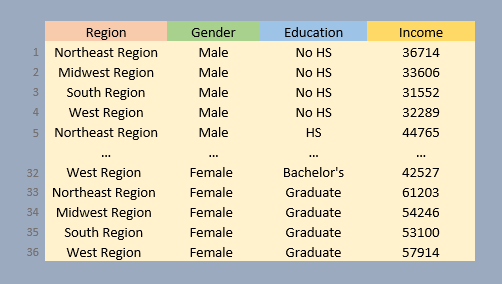

In [59]:
Image("res/Tidy_census.png")

### It is intuitive...  Look how convenient it is!!

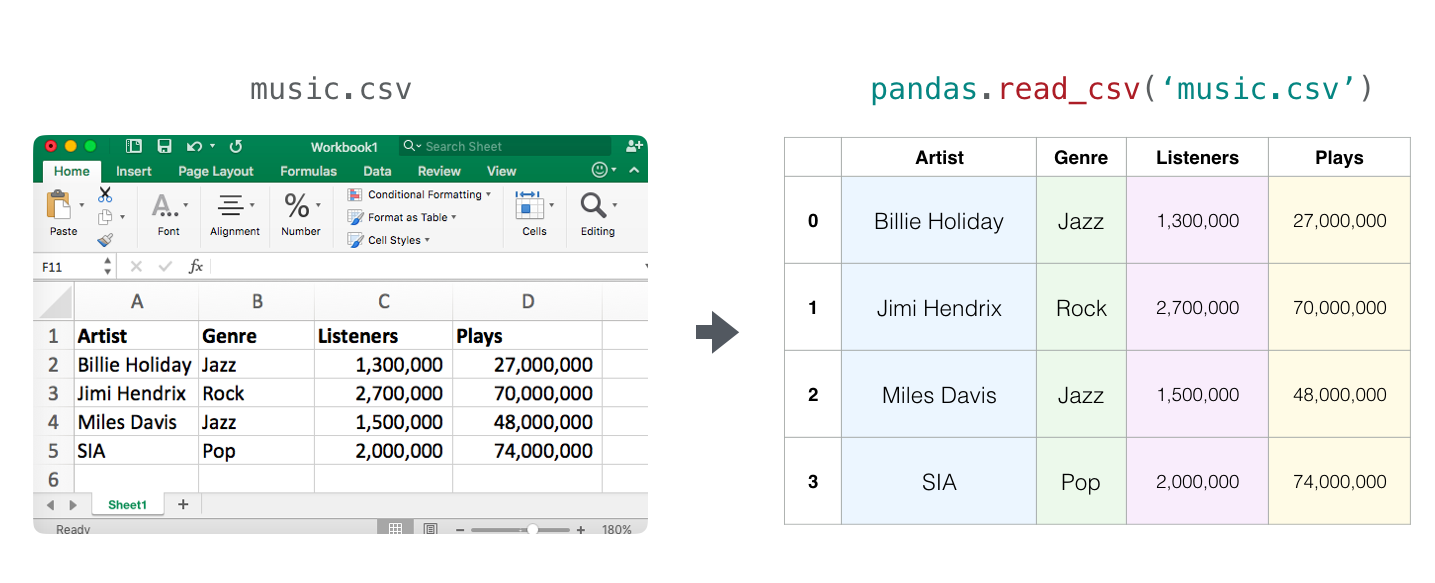

In [60]:
Image('res/excel-to-pandas.png')

source: https://jalammar.github.io/

### Describing the Data Frame...
- df.count())
- df.describe())
- df.mean())

In [61]:
print(df,"\n")
df.info()
#print("df.count()  \n",df.count())
#print("\n df.describe() \n",df.describe())
#print("\n df.mean() \n",df.mean())

       0  1  2  3
0  Hello  0  3  3
1      7  9  3  5
2      2  4  7  6 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3 non-null      object
 1   1       3 non-null      int64 
 2   2       3 non-null      int64 
 3   3       3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


In [62]:
type(df.iloc[:,1])

pandas.core.series.Series

In [63]:
pd.Series([3,4,5])   ##. Pandas Series is a one dimentional data frame


0    3
1    4
2    5
dtype: int64

### Pandas Data Frame operations

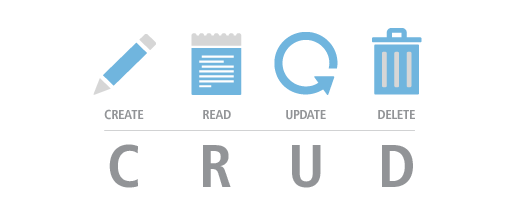

In [64]:
Image("res/CRUD.png")

### Data Frame creation
You can create/form a Data Frame from:
- Dict of 1D ndarrays, lists, dicts, or Series

- 2-D numpy.ndarray

- Structured or record ndarray

- A Series

- Another DataFrame

#### Here is an example...

In [65]:
print('dic = {"col1": [1.0, 2.0, 3.0, 4.0], "col2": [4.0, 3.0, 2.0, 1.0]}\n')

dic = {"col1": [1.0, 2.0, 3.0, 4.0], "col2": [4.0, 3.0, 2.0, 1.0]}

print("pd.DataFrame(dic)\n\n",pd.DataFrame(dic))

dic = {"col1": [1.0, 2.0, 3.0, 4.0], "col2": [4.0, 3.0, 2.0, 1.0]}

pd.DataFrame(dic)

    col1  col2
0   1.0   4.0
1   2.0   3.0
2   3.0   2.0
3   4.0   1.0


#### creating Index for the Data frame...

In [66]:
print('pd.DataFrame(dic, index=["a", "b", "c", "d"]\n\n',
      pd.DataFrame(dic, index=["a", "b", "c", "d"]))

pd.DataFrame(dic, index=["a", "b", "c", "d"]

    col1  col2
a   1.0   4.0
b   2.0   3.0
c   3.0   2.0
d   4.0   1.0


### Creating Data frame from Pandas Series objects.. 

d = {
       "apples": pd.Series([3, 2, 0,1]),
        "oranges": pd.Series([0, 3, 7, 2]),
    }

pd.DataFrame(d)

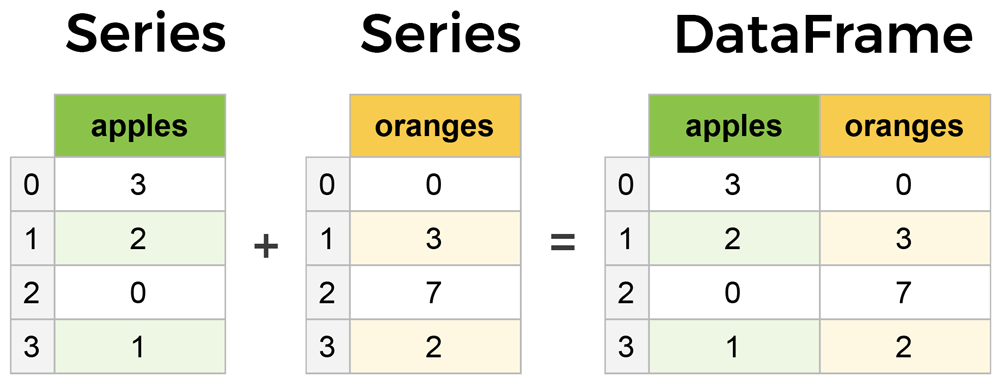

In [67]:
Image("res/series-and-dataframe.width-1200.png")

source: https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png

### Data Frame Selection / Indexing

In [69]:
data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai',
             'Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}

row_labels = [101, 102, 103, 104, 105, 106, 107]
students_df = pd.DataFrame(data=data, index=row_labels)
students_df

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


Source: https://realpython.com/

### data Selection

In [70]:
print('df["city"]')
cities = students_df['city']
cities

df["city"]


101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object

In [71]:
print("df.city")
students_df.city

df.city


101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object

### Selecting by Label
- .loc[]  function

In [72]:
#print("students_df.loc[:, 'city']")
#students_df.loc[:, 'city']

In [73]:
print("students_df.loc[102:106, ['name', 'city']]")
students_df.loc[102:106,:]

students_df.loc[102:106, ['name', 'city']]


,name,city,age,py-score
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0


### Selecting by Position
- .iloc[]

In [74]:
#print("students_df.iloc[:, 1]")
#students_df.iloc[:, 1]

In [75]:
print("students_df.iloc[1:6, [0, 1]]")
students_df.iloc[1:6, [0, 1]]

students_df.iloc[1:6, [0, 1]]


,name,city
102,Ann,Toronto
103,Jana,Prague
104,Yi,Shanghai
105,Robin,Manchester
106,Amal,Cairo


### Hmm.. Can you tell what is the difference?

#### You can use loc and iloc also to select certain data values but better to use at[] and iat[]

In [76]:
print('df.at[103, name]')
students_df.at[103, 'name']

df.at[103, name]


'Jana'

In [77]:
print('df.iat[2, 0]')
students_df.iat[2, 0]

df.iat[2, 0]


'Jana'

### Setting/ Updating data

#### let us first update the Data frame index..

In [78]:
print ('df.index = np.arange(10, 17)')
students_df.index = list(np.arange(10, 17))
students_df

df.index = np.arange(10, 17)


,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


In [79]:
print('df.loc[:13, py-score] = [40, 50, 60, 70]')
students_df.loc[:13, 'py-score'] = [40, 50, 60, 70]
print('df.loc[14:, py-score] = 0')
students_df.loc[14:, 'py-score'] = 0
students_df

df.loc[:13, py-score] = [40, 50, 60, 70]
df.loc[14:, py-score] = 0


,name,city,age,py-score
10,Xavier,Mexico City,41,40.0
11,Ann,Toronto,28,50.0
12,Jana,Prague,33,60.0
13,Yi,Shanghai,34,70.0
14,Robin,Manchester,38,0.0
15,Amal,Cairo,31,0.0
16,Nori,Osaka,37,0.0


In [80]:
students_df.iloc[:, -1] = np.array([88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0])
students_df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


### Inserting/deleteing rows

In [81]:
Ronald = pd.Series(data=['Ronald', 'Berlin', 34, 79],
                 index=students_df.columns[0:4],name=21)

In [82]:
Marcus = pd.Series(data=['Marcus', 'Berlin', 34, 79],
                 index=students_df.columns[0:4],name="21")

In [83]:
print('df=df.append(john)')
students_df=students_df.append(Ronald)
students_df

df=df.append(john)


,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0
21,Ronald,Berlin,34,79.0


In [84]:
students_df.index

Int64Index([10, 11, 12, 13, 14, 15, 16, 21], dtype='int64')

In [85]:
#print('df = df.drop(labels=[17])')
students_df.drop(labels=[21],inplace=True)
students_df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


In [86]:
x=[1,3,4,5,8,9,12,100]

In [87]:
students_df["py-score"]

10    88.0
11    79.0
12    81.0
13    80.0
14    68.0
15    61.0
16    84.0
Name: py-score, dtype: float64

In [88]:
students_df[students_df["py-score"]<=np.percentile(students_df["py-score"], 25)]

,name,city,age,py-score
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0


In [89]:
np.median(np.array(x))

6.5

### Inserting/Deleting columns

In [90]:
#print('df[js-score] = np.array([71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80.0])')
students_df['js-score'] =np.array([71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80.0])
students_df

,name,city,age,py-score,js-score
10,Xavier,Mexico City,41,88.0,71.0
11,Ann,Toronto,28,79.0,95.0
12,Jana,Prague,33,81.0,88.0
13,Yi,Shanghai,34,80.0,79.0
14,Robin,Manchester,38,68.0,91.0
15,Amal,Cairo,31,61.0,91.0
16,Nori,Osaka,37,84.0,80.0


### Inserting in a specific location

In [92]:
#print('df.insert(loc=4, column=js-score,value=np.array([86.0, 81.0, 78.0, 88.0, 74.0, 70.0, 81.0]))')
students_df.insert(loc=4, column='ux-score',
          value=np.array([70, 74, 78, 56, 66, 78, 81.0]))
students_df

,name,city,age,py-score,ux-score,js-score
10,Xavier,Mexico City,41,88.0,70.0,71.0
11,Ann,Toronto,28,79.0,74.0,95.0
12,Jana,Prague,33,81.0,78.0,88.0
13,Yi,Shanghai,34,80.0,56.0,79.0
14,Robin,Manchester,38,68.0,66.0,91.0
15,Amal,Cairo,31,61.0,78.0,91.0
16,Nori,Osaka,37,84.0,81.0,80.0


### dropping specific column

In [93]:
print('df = df.drop(labels=age, axis=1)')
students_df = students_df.drop(labels=['ux-score'], axis=1)

df = df.drop(labels=age, axis=1)


In [94]:
students_df

,name,city,age,py-score,js-score
10,Xavier,Mexico City,41,88.0,71.0
11,Ann,Toronto,28,79.0,95.0
12,Jana,Prague,33,81.0,88.0
13,Yi,Shanghai,34,80.0,79.0
14,Robin,Manchester,38,68.0,91.0
15,Amal,Cairo,31,61.0,91.0
16,Nori,Osaka,37,84.0,80.0


### Filtering/Boolean Indexing

In [95]:
#print('filter_ = df[django-score] >= 80')
very_good_students_filter = students_df['py-score'] >= 50
very_good_students_filter

10    True
11    True
12    True
13    True
14    True
15    True
16    True
Name: py-score, dtype: bool

In [96]:
students_df[very_good_students_filter]

,name,city,age,py-score,js-score
10,Xavier,Mexico City,41,88.0,71.0
11,Ann,Toronto,28,79.0,95.0
12,Jana,Prague,33,81.0,88.0
13,Yi,Shanghai,34,80.0,79.0
14,Robin,Manchester,38,68.0,91.0
15,Amal,Cairo,31,61.0,91.0
16,Nori,Osaka,37,84.0,80.0


In [97]:
students_df["js-score-updated"]= students_df["js-score"] +5

In [98]:
students_df.age>40

10     True
11    False
12    False
13    False
14    False
15    False
16    False
Name: age, dtype: bool

In [99]:
students_df[students_df.age>40]

,name,city,age,py-score,js-score,js-score-updated
10,Xavier,Mexico City,41,88.0,71.0,76.0


In [101]:
print('df[filter_]')
students_df[very_good_students_filter]

df[filter_]


,name,city,age,py-score,js-score,js-score-updated
10,Xavier,Mexico City,41,88.0,71.0,76.0
11,Ann,Toronto,28,79.0,95.0,100.0
12,Jana,Prague,33,81.0,88.0,93.0
13,Yi,Shanghai,34,80.0,79.0,84.0
14,Robin,Manchester,38,68.0,91.0,96.0
15,Amal,Cairo,31,61.0,91.0,96.0
16,Nori,Osaka,37,84.0,80.0,85.0


### Creating powerful filters with Logical operators AND, OR, NOT, XOR

In [108]:
#print('df[(df[py-score] >= 80) & (df[js-score] >= 80)]')
students_df[(students_df['py-score'] >= 40) & (students_df['js-score'] >= 80)]

,name,city,age,py-score,js-score,js-score-updated
11,Ann,Toronto,28,79.0,95.0,100.0
12,Jana,Prague,33,81.0,88.0,93.0
14,Robin,Manchester,38,68.0,91.0,96.0
15,Amal,Cairo,31,61.0,91.0,96.0
16,Nori,Osaka,37,84.0,80.0,85.0


### Working with Missing Data

### np.nan is used to represent missing values

In [103]:
print("df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})")
df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})
df_

df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})


,x
0,1.0
1,2.0
2,NaN
3,4.0


In [104]:
df_["y"]=[2,np.nan,4,5]
df_

,x,y
0,1.0,2.0
1,2.0,NaN
2,NaN,4.0
3,4.0,5.0


### Dropping rows that contains missing values 

In [105]:
#print("df_.dropna()")
df_.dropna()
df_

,x,y
0,1.0,2.0
1,2.0,NaN
2,NaN,4.0
3,4.0,5.0


### and you can fill the missing values with fillna..

In [106]:
df_.mean()

x    2.333333
y    3.666667
dtype: float64

In [107]:
df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})
print('df_.fillna(value=0)\n',df_.fillna(value=0))
print("\ndf_.fillna(method=ffill)\n",df_.fillna(method='ffill'))
print("\ndf_.fillna(method=bfill)\n",df_.fillna(method='bfill'))

df_.fillna(value=0)
      x
0  1.0
1  2.0
2  0.0
3  4.0

df_.fillna(method=ffill)
      x
0  1.0
1  2.0
2  2.0
3  4.0

df_.fillna(method=bfill)
      x
0  1.0
1  2.0
2  4.0
3  4.0


### Applying functions

### Applying Arithmetic functions

In [116]:
students_df['total'] =\
    0.4 * students_df['py-score'] + 0.3 * students_df['js-score']
students_df


,name,city,age,py-score,js-score,js-score-updated,total
10,Xavier,Mexico City,41,88.0,71.0,76.0,56.5
11,Ann,Toronto,28,79.0,95.0,100.0,60.1
12,Jana,Prague,33,81.0,88.0,93.0,58.8
13,Yi,Shanghai,34,80.0,79.0,84.0,55.7
14,Robin,Manchester,38,68.0,91.0,96.0,54.5
15,Amal,Cairo,31,61.0,91.0,96.0,51.7
16,Nori,Osaka,37,84.0,80.0,85.0,57.6


In [117]:
students_df.iloc[:, 3:5]

,py-score,js-score
10,88.0,71.0
11,79.0,95.0
12,81.0,88.0
13,80.0,79.0
14,68.0,91.0
15,61.0,91.0
16,84.0,80.0


### using existing NumPy funnction instead of writing your own function

In [118]:
##del students_df['total']

#print("students_df['total'] = np.average(students_df.iloc[:, 2:5], axis=1,weights=[0.4, 0.3, 0.3])")
students_df['total'] = np.average(students_df.iloc[:, 3:5], axis=1,
                         weights=[0.4, 0.3])
students_df

,name,city,age,py-score,js-score,js-score-updated,total
10,Xavier,Mexico City,41,88.0,71.0,76.0,80.714286
11,Ann,Toronto,28,79.0,95.0,100.0,85.857143
12,Jana,Prague,33,81.0,88.0,93.0,84.000000
13,Yi,Shanghai,34,80.0,79.0,84.0,79.571429
14,Robin,Manchester,38,68.0,91.0,96.0,77.857143
15,Amal,Cairo,31,61.0,91.0,96.0,73.857143
16,Nori,Osaka,37,84.0,80.0,85.0,82.285714


In [119]:
students_df

,name,city,age,py-score,js-score,js-score-updated,total
10,Xavier,Mexico City,41,88.0,71.0,76.0,80.714286
11,Ann,Toronto,28,79.0,95.0,100.0,85.857143
12,Jana,Prague,33,81.0,88.0,93.0,84.000000
13,Yi,Shanghai,34,80.0,79.0,84.0,79.571429
14,Robin,Manchester,38,68.0,91.0,96.0,77.857143
15,Amal,Cairo,31,61.0,91.0,96.0,73.857143
16,Nori,Osaka,37,84.0,80.0,85.0,82.285714


## Map function with Lambda

In [120]:
list(map(lambda x:x+10,students_df["py-score"]))

[98.0, 89.0, 91.0, 90.0, 78.0, 71.0, 94.0]

### Categorical Variables

In [121]:
print("let us take this Data Frame...")
df = pd.DataFrame(
  {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

let us take this Data Frame...


,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [122]:
#print("Let us convert it to a categorical variable...\n\ndf[grade] = df[raw_grade].astype(category)")
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [123]:
df["grade"].cat.categories

Index(['a', 'b', 'e'], dtype='object')

In [124]:
print('df["grade"].cat.categories = ["very good", "good", "very bad"]')
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"].cat.categories = ["very good", "good", "very bad"]


In [125]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [126]:
print('Injecting new categories...\ndf["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])')

df["grade"] = df["grade"].cat.set_categories(
       ["very bad", "bad", "medium", "good", "very good"]
    )
df["grade"]

Injecting new categories...
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [127]:
print('df.sort_values(by="grade")')
df.sort_values(by="grade")

df.sort_values(by="grade")


,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


### Concatinating
- concat mutilpe data frames on the same axis.
- pd.concat()

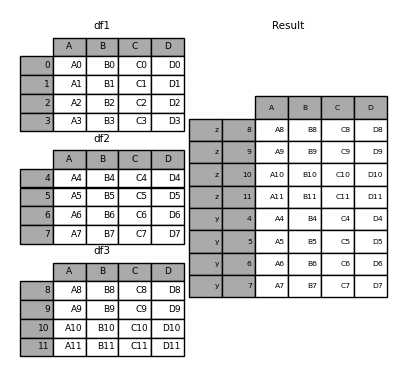

In [128]:
Image("res/merging_concat_dict_keys.png")

source:pandas.pydata.org

In [129]:
print('df = pd.DataFrame(np.random.randn(10, 4))')
df = pd.DataFrame(np.random.randn(7, 4))
print(df)
print("\npieces = [df[:2], df[2:4], df[4:]]")
pieces = [df[:2], df[2:4], df[4:]]
pieces

df = pd.DataFrame(np.random.randn(10, 4))
          0         1         2         3
0  1.254414  1.419102 -0.743856 -2.517437
1 -1.507096  1.149076 -1.193578  1.141042
2  1.509445  1.067775 -0.686589  0.014873
3 -0.375666 -0.038224  0.367974 -0.044724
4 -0.302375 -2.224404  0.724006  0.359003
5  1.076121  0.192141  0.852926  0.018357
6  0.428304  0.996278 -0.491150  0.712678

pieces = [df[:2], df[2:4], df[4:]]


[          0         1         2         3
 0  1.254414  1.419102 -0.743856 -2.517437
 1 -1.507096  1.149076 -1.193578  1.141042,
           0         1         2         3
 2  1.509445  1.067775 -0.686589  0.014873
 3 -0.375666 -0.038224  0.367974 -0.044724,
           0         1         2         3
 4 -0.302375 -2.224404  0.724006  0.359003
 5  1.076121  0.192141  0.852926  0.018357
 6  0.428304  0.996278 -0.491150  0.712678]

In [130]:
print("\npd.concat(pieces)")
pd.concat(pieces)


pd.concat(pieces)


,0,1,2,3
0,1.254414,1.419102,-0.743856,-2.517437
1,-1.507096,1.149076,-1.193578,1.141042
2,1.509445,1.067775,-0.686589,0.014873
3,-0.375666,-0.038224,0.367974,-0.044724
4,-0.302375,-2.224404,0.724006,0.359003
5,1.076121,0.192141,0.852926,0.018357
6,0.428304,0.996278,-0.491150,0.712678


### Merging
#### - Similar to SQL Join operations

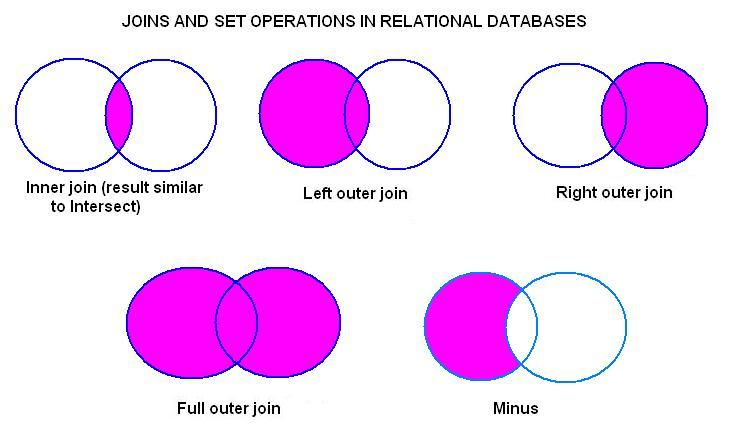

In [133]:
Image("res/joins.jpeg")

source:https://www1.udel.edu/ , https://www.expii.com/

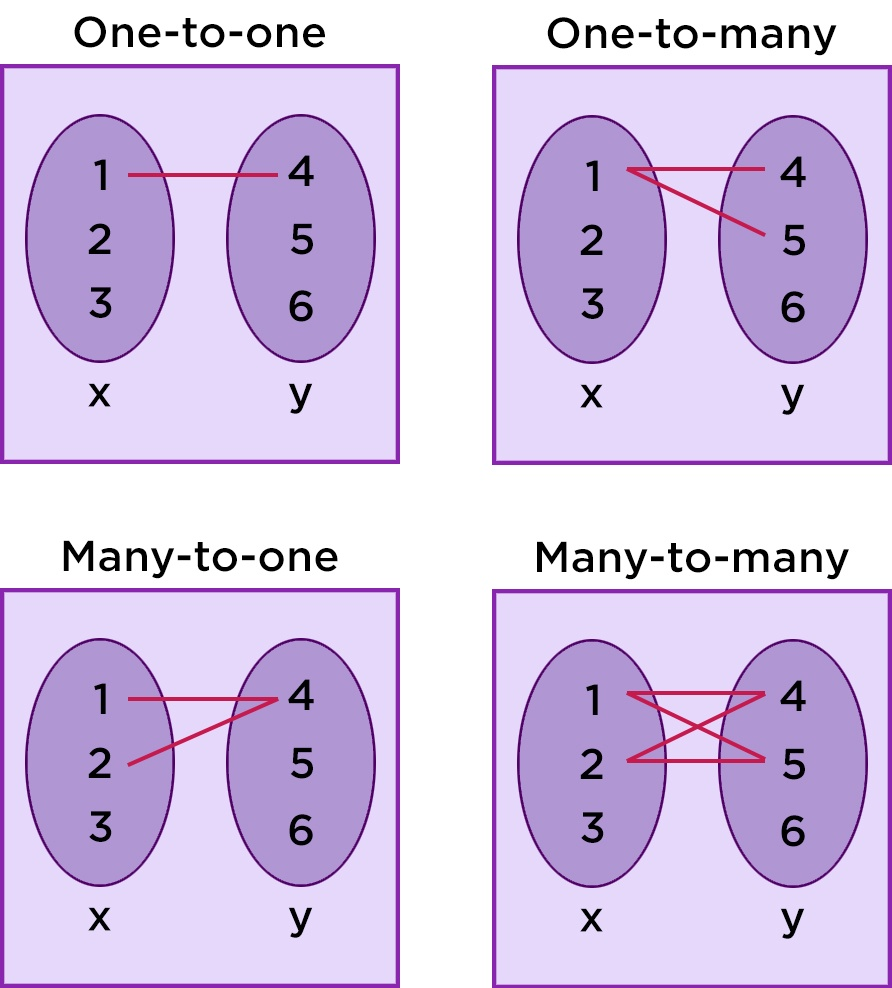

In [134]:
Image("res/four_relations.jpeg")

In [135]:
left = pd.DataFrame(
       {
            "key1": ["K0", "K0", "K1", "K2"],
            "key2": ["K0", "K1", "K0", "K1"],
            "A": ["A0", "A1", "A2", "A3"],
            "B": ["B0", "B1", "B2", "B3"],
        }
    )
    

right = pd.DataFrame(
        {
            "key1": ["K0", "K1", "K1", "K2"],
            "key2": ["K0", "K0", "K0", "K0"],
            "C": ["C0", "C1", "C2", "C3"],
            "D": ["D0", "D1", "D2", "D3"],
        }
    )

print("left \n",left)
print("\nright\n",right)
print("\npd.merge(left, right,how=right, on=[key1, key2],indicator=True)")
result = pd.merge(left, right,how="right", on=["key1", "key2"],indicator=True)
result

left 
   key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3

right
   key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3

pd.merge(left, right,how=right, on=[key1, key2],indicator=True)


,key1,key2,A,B,C,D,_merge
0,K0,K0,A0,B0,C0,D0,both
1,K1,K0,A2,B2,C1,D1,both
2,K1,K0,A2,B2,C2,D2,both
3,K2,K0,NaN,NaN,C3,D3,right_only


## Grouping

### - Splitting
- splitting Data Frame into sub groups by key value or values
- equal to "group By" in SQL. 

### - Applying
   - Aggregation
       - applying one or multiple functions in to the items within each subgroup.
   - Transformation
        - broadcasting the results into the original data frame
   - Filteration
        - equivelant to HAVING in SQL
        
### - Combining
    - combining the results to fit into the data pipeline and/or delivers the insights

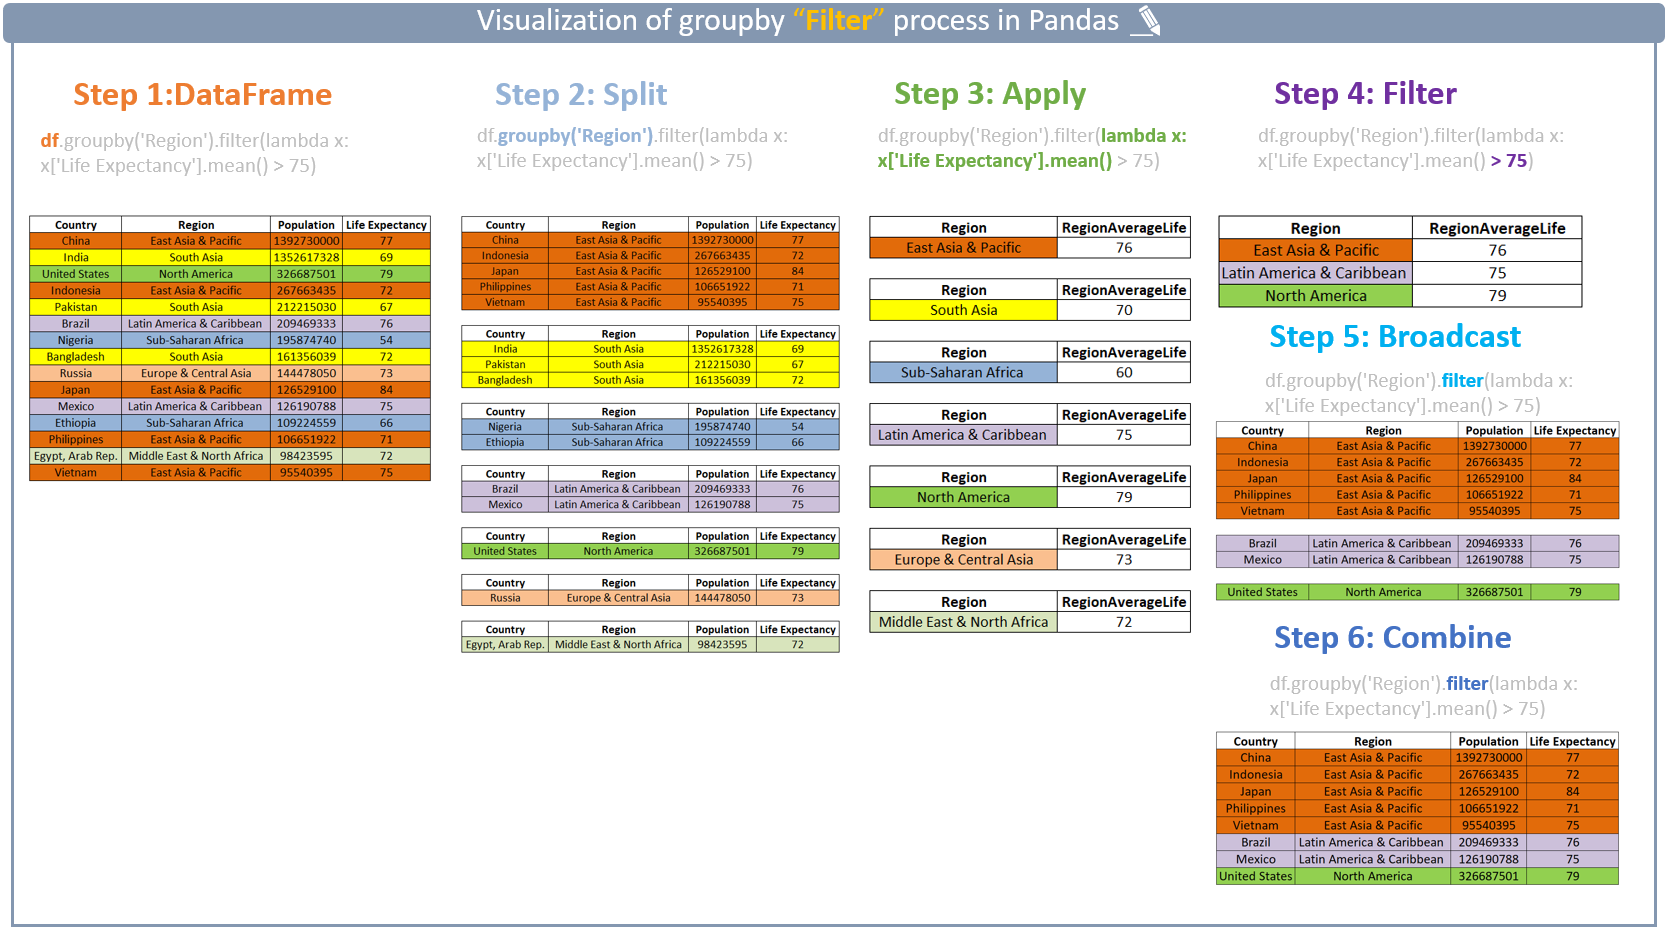

In [131]:
Image("res/grouping.png")

source:https://towardsdatascience.com/aggregation-transform-filter-how-and-when-to-use-them-31ed7eb88d2e

### dummy variables
- dummy variables are binary variables that represents the values that categorical variables hold. 
- It is effecient representation for programming, preprocessing, analysing and ML tasks purposes.

#### Here is an example...

In [136]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [137]:
print("pd.get_dummies(df, prefix=['col1', 'col2'])")
pd.get_dummies(df, prefix=['col1', 'col2'])

pd.get_dummies(df, prefix=['col1', 'col2'])


,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


### Sparse Data Frames

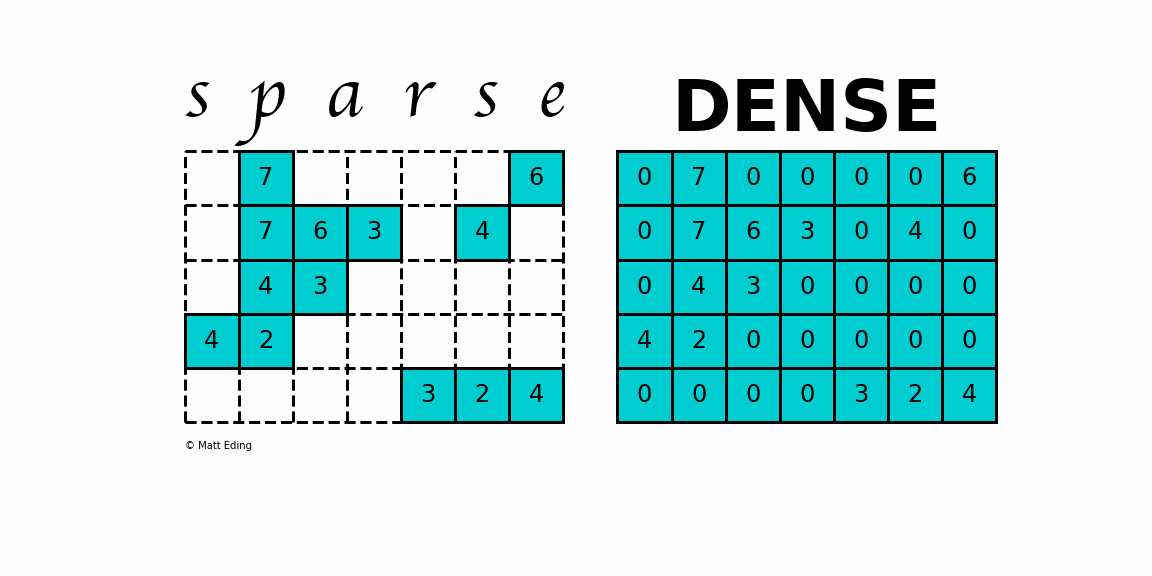

In [138]:
Image("res/Sparse_dense.gif")

source: https://matteding.github.io/

In [139]:
print("df = pd.DataFrame(np.random.randn(10000,4))")
df = pd.DataFrame(np.random.randn(10000,4))
print("\nlet us try to fill NAN values..\n\ndf.iloc[:9998] = np.nan")

df.iloc[:9998] = np.nan
print(df.memory_usage())

print("\nConverting to Sparse Data type\nsdf = df.astype(pd.SparseDtype(float, np.nan))\n")
sdf = df.astype(pd.SparseDtype("float", np.nan))

sdf.memory_usage()

df = pd.DataFrame(np.random.randn(10000,4))

let us try to fill NAN values..

df.iloc[:9998] = np.nan
Index      128
0        80000
1        80000
2        80000
3        80000
dtype: int64

Converting to Sparse Data type
sdf = df.astype(pd.SparseDtype(float, np.nan))



Index    128
0         24
1         24
2         24
3         24
dtype: int64

### Pandas best practices

- Keep in mind that Pandas provides only in-memory analytics.
- perfrom ETL operations, pre-processing of larget data sets first then load the preprocesses data into Pandas.
- use effecient Data types.
- Use Pandas for devleopment/ testing, proof-of-concept use cases rather than production environment for your Data product.
- it is not recommended for building automated data pipelines. where other tools are more effecient(e.g. pySpark) or parallel computing library such as Dask.

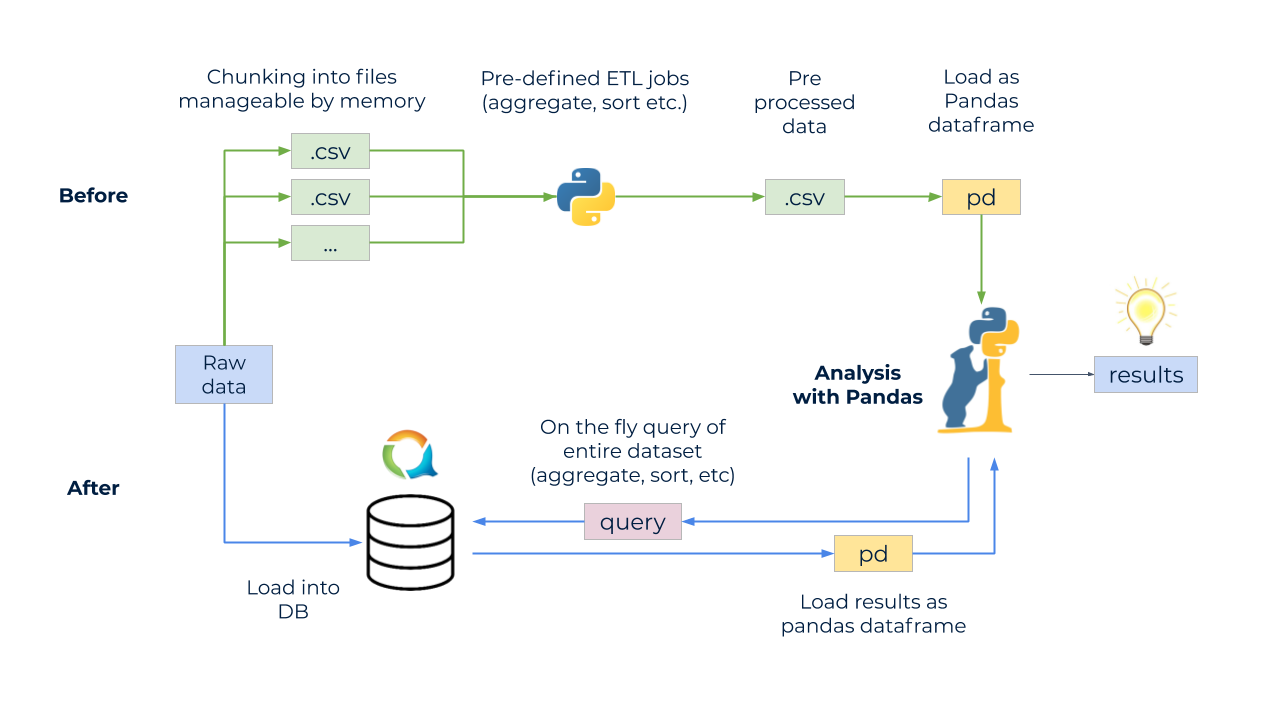

In [140]:
Image("res/pandas_memory_bypassing.png")

source:https://towardsdatascience.com/

### I/O operations
- reading data directly from csv, text, Excel files, DFS
- Pandas Data Frames are not peristent storage!
- writing data directly to file storage.

In [ ]:
print("students_df.to_csv(students_df.csv)\n\nData frame is saved persistentally to the file storage...")
students_df.to_csv("students_df.csv")

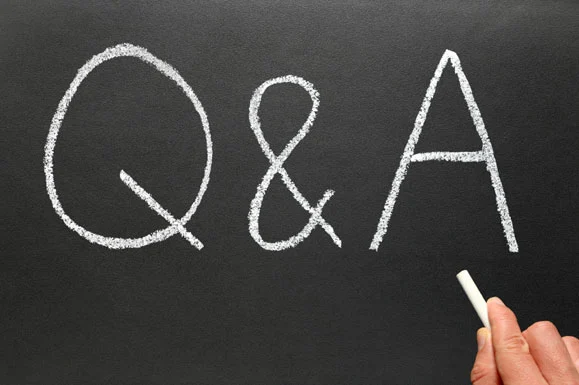

In [132]:
Image("res/Q&A.png")